In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import igraph as ig
from collections import Counter
import pickle
import math

from src import acgraph as acg
from src import bcloader as bcl
from src import utils as ut
from src import bcgraph as bcg
from efficient_apriori import apriori
from src import xsmining as xsm

In [2]:
usrlabels, usrlabel_to_attvals, usrname_to_usrlabel, \
reslabels, reslabel_to_attvals, resname_to_reslabel, usrlabel_to_reslabel = xsm.load_dataset(name='HC')
print('Num entries:', len(usrlabel_to_reslabel))

Num entries: 1576


In [3]:
usratts = set()
for attvals in usrlabel_to_attvals.values():
    for attval in attvals:
        usratts.add(attval[0])

resatts = set()
for attvals in reslabel_to_attvals.values():
    for attval in attvals:
        resatts.add(attval[0])
    
print('Num atts:', len(usratts) + len(resatts))
print('Num attvals:', len(usrlabel_to_attvals) + len(reslabel_to_attvals))

Num atts: 12
Num attvals: 920


In [4]:
#---Create access control graph---
gur = xsm.load_gur(usrlabels, reslabels, usrlabel_to_reslabel, save=False)
print('Num of users:', len(usrlabels))
print('Num of resources:', len(reslabels))
print('Num of edges:', len(gur.es))

Num of users: 200
Num of resources: 420
Num of edges: 1576


Num of bcs: 261
Number of covered edges: 1576
Number of covered users: 200
Number of covered resources: 420


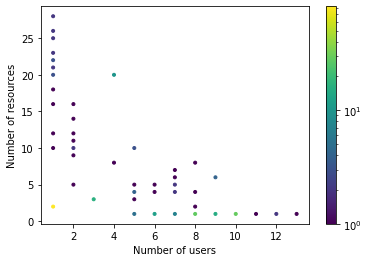

In [5]:
#---Load bicliques---
k = (1,1)
bcs = xsm.load_bicliques('HC', gur, k, usrlabel_to_attvals, reslabel_to_attvals)
print('Num of bcs:', len(bcs))
print('Number of covered edges:', xsm.get_num_covered_edges(bcs))
print('Number of covered users:', xsm.get_num_covered_users(bcs))
print('Number of covered resources:', xsm.get_num_covered_resources(bcs))
xsm.plot_sizes_freq(bcs, None)

In [7]:
temp = []
for bc in bcs:
    if len(bc.get_usrids()) == len(bc.get_resids()):
        temp.append(bc)
x = max([len(bc.get_resids()) for bc in temp])
print('Largest symm bc:', x)

Largest symm bc: 8


In [6]:
subbcs = xsm.get_subbcs(bcs)
print('Num of bcs with regular patterns:', len(subbcs))
print('Number of covered edges:', xsm.get_num_covered_edges(subbcs))
print('Number of covered users:', xsm.get_num_covered_users(subbcs))
print('Number of covered resources:', xsm.get_num_covered_resources(subbcs))

Num of bcs with regular patterns: 105
Number of covered edges: 1132
Number of covered users: 132
Number of covered resources: 301
